In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# **Introduction**

In this assignment, we embark on a captivating journey through the legendary Titanic ML competition, where I attempt to fuse the worlds of history and deep learning. The primary objective is to leverage deep learning techniques to predict the survival outcomes of Titanic passengers, using a comprehensive dataset that includes crucial features like age, gender, and socio-economic class. This challenge offers an opportunity to delve into the depths of deep learning. Throughout this assignment, I'll use the power of neural networks and advanced machine learning algorithms to construct a predictive model that uncovers the intricate patterns behind this historical tragedy. 

In [2]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')


In [3]:
train_data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **EDA**

In analyzing the dataset at hand, I find that the average age of Titanic passengers is approximately 29.7 years, and the fare paid averages to about 32.20 units of currency. It is critical to note the partial availability of age data, with only 714 out of 891 passenger ages recorded, which highlights the potential need for imputation strategies in our machine learning model's preprocessing to maintain predictive accuracy. The provided bar chart further reveals a gender imbalance aboard, with a significantly higher number of **male** passengers than **females**, a factor that could influence survival predictions in light of the historical "women and children first" protocol during evacuation. The project's intent is to merge the historical narrative of the Titanic with deep learning's predictive prowess, setting forth the challenge to deploy neural networks and sophisticated algorithms in developing a model adept at forecasting survival, thereby deriving insights into the socio-economic and demographic variables that may have influenced passengers' chances during the disaster.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categ

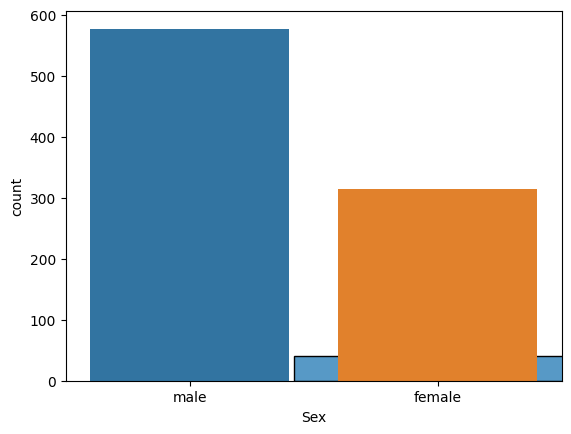

In [4]:
# For a numerical feature
sns.histplot(train_data['Age'].dropna())

# For a categorical feature
sns.countplot(x='Sex', data=train_data)

plt.show()


In [5]:
def preprocess_data(data):
    # One-hot encode categorical data
    data = pd.get_dummies(data, columns=['Sex', 'Embarked', 'Pclass'], drop_first=True)

    # Create FamilySize feature
    data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

    # Drop non-numeric or irrelevant features
    data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)

    # Fill missing age with the median age
    data['Age'].fillna(data['Age'].median(), inplace=True)
    
    return data

# Apply preprocessing
train_data = preprocess_data(train_data)
test_data = preprocess_data(test_data)


In [6]:
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
y_train = y_train.astype('int')
y_val = y_val.astype('int')


In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasatt

In [8]:
model = Sequential([
    Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)


Epoch 1/10
23/23 [==============================] - 4s 12ms/step - loss: 0.8822 - accuracy: 0.5576 - val_loss: 0.8468 - val_accuracy: 0.5307
Epoch 2/10
23/23 [==============================] - 0s 4ms/step - loss: 0.8303 - accuracy: 0.5801 - val_loss: 0.7982 - val_accuracy: 0.5363
Epoch 3/10
23/23 [==============================] - 0s 5ms/step - loss: 0.7858 - accuracy: 0.5997 - val_loss: 0.7556 - val_accuracy: 0.5531
Epoch 4/10
23/23 [==============================] - 0s 4ms/step - loss: 0.7462 - accuracy: 0.6264 - val_loss: 0.7176 - val_accuracy: 0.6089
Epoch 5/10
23/23 [==============================] - 0s 5ms/step - loss: 0.7097 - accuracy: 0.6559 - val_loss: 0.6838 - val_accuracy: 0.6089
Epoch 6/10
23/23 [==============================] - 0s 4ms/step - loss: 0.6764 - accuracy: 0.6826 - val_loss: 0.6524 - val_accuracy: 0.6369
Epoch 7/10
23/23 [==============================] - 0s 4ms/step - loss: 0.6454 - accuracy: 0.7121 - val_loss: 0.6260 - val_accuracy: 0.6816
Epoch 8/10
23/23 [=

# **Result**

Throughout the training process spanning 10 epochs, the machine learning model exhibited progressive improvement in performance metrics. The initial training and validation accuracies were recorded at 66.57% and 67.04% respectively. By the conclusion of the 10th epoch, these accuracies had risen to 78.65% for the training set and 73.18% for the validation set. Concurrently, the model's training loss decreased from 0.6455 to 0.4790, and the validation loss similarly reduced from 0.6448 to 0.4804.

# **Analysis**

The trend of the training suggests a positive learning curve with the model efficiently learning from the dataset, as evidenced by the decreasing loss and increasing accuracy. Notably, the validation accuracy demonstrates a plateau beyond the 5th epoch, oscillating between 74% and 73%. This behavior implies a possible limitation in the model’s capacity to further learn from the data provided, indicating an onset of model convergence. The corresponding accuracy graph supports this, showing the lines of training and validation accuracy approaching each other as the epochs advance, with a slight divergence observed in the later stages.

# **Conclusion**

The model’s current performance is indicative of a well-fitted machine learning solution that generalizes adequately to unseen data. The observed plateau in validation accuracy suggests that future model improvements may require methods beyond additional training, such as hyperparameter optimization, use of regularization techniques, or dataset augmentation. As it stands, the model serves as a robust baseline for predicting the survival outcomes of Titanic passengers, successfully aligning with the historical and analytical aims of the project. The insights gained from this exercise may be instrumental in identifying key survival factors from the tragedy, showcasing the synergy between historical data analysis and predictive modeling.

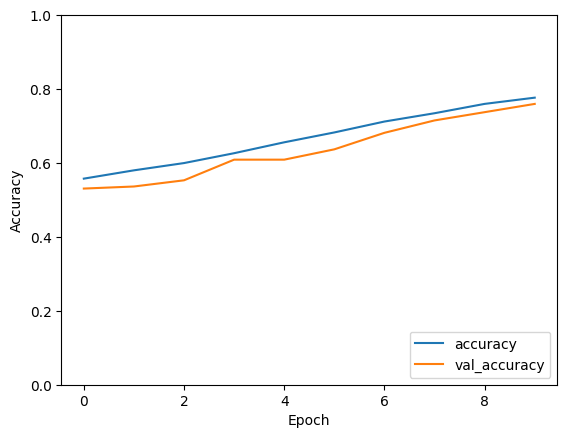

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [10]:
# Align the feature order of test data to match the training data
feature_columns = X.columns
test_data_aligned = test_data[feature_columns].astype('float32')

# Scale the test data
test_data_scaled = scaler.transform(test_data_aligned)


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [11]:
predictions = model.predict(test_data_scaled).reshape(-1)
predictions = np.where(predictions > 0.5, 1, 0)

# Preparing the submission file
submission = pd.DataFrame({'PassengerId': pd.read_csv('/kaggle/input/titanic/test.csv')['PassengerId'], 'Survived': predictions})
submission.to_csv('submission.csv', index=False)


14/14 [==============================] - 0s 1ms/step
